# Data Understanding
This notebook purpose is to get to know our data and its charetrastics 
The notbook includes:
* [Dataset description](#dataset_description)
* [Data loading and metadata extraction](#data_loading)
* [Basic descriptive statistics](#basic_descriptive_statistics)
* [Statistical measures](#statistical_measures)
    * [Entropy](#entropy)
    * [Mutual Information](#mutual_information)
    * [Correlation](#correlation)
* [Data visualization](#data_visualization)


---

In [ ]:
from IPython.display import HTML
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn import metrics

## <a name="dataset_description"></a>Dataset Description:

Each row represent a real estate sale. It's properties, and it's sale price.
The features are:

A RE property is described by the following properties:
* Borough: 
The name of the borough in which the property is located.

* Neighborhood: 
Department of Finance assessors determine the neighborhood name in the course of valuing
properties. The common name of the neighborhood is generally the same as the name
Finance designates. However, there may be slight differences in neighborhood boundary lines
and some sub-neighborhoods may not be included. 

* Building Class Category:
This is a field that we are including so that users of the Rolling Sales Files can easily
identify similar properties by broad usage (e.g. One Family Homes) without looking up
individual Building Classes. Files are sorted by Borough, Neighborhood, Building Class
Category, Block and Lot.

* Tax Class at Present:
Every property in the city is assigned to one of four tax classes (Classes 1, 2, 3, and 4),
based on the use of the property.
• Class 1: Includes most residential property of up to three units (such as one-,
two-, and three-family homes and small stores or offices with one or two
attached apartments), vacant land that is zoned for residential use, and most
condominiums that are not more than three stories.
• Class 2: Includes all other property that is primarily residential, such as
cooperatives and condominiums.
• Class 3: Includes property with equipment owned by a gas, telephone or electric
company.
• Class 4: Includes all other properties not included in class 1,2, and 3, such as
offices, factories, warehouses, garage buildings, etc. 

* Block: 
A Tax Block is a sub-division of the borough on which real properties are located.
The Department of Finance uses a Borough-Block-Lot classification to label all real
property in the City. “Whereas” addresses describe the street location of a property, the
block and lot distinguishes one unit of real property from another, such as the different
condominiums in a single building. Also, block and lots are not subject to name changes
based on which side of the parcel the building puts its entrance on. 

* Lot:
A Tax Lot is a subdivision of a Tax Block and represents the property unique location

* Easement: 
An easement is a right, such as a right of way, which allows an entity to make limited use of
another’s real property. For example: MTA railroad tracks that run across a portion of another
property.

* Building Class at Present: 
The Building Classification is used to describe a property’s constructive use. The first position
of the Building Class is a letter that is used to describe a general class of properties (for
example “A” signifies one-family homes, “O” signifies office buildings. “R” signifies
condominiums). The second position, a number, adds more specific information about the
property’s use or construction style (using our previous examples “A0” is a Cape Cod style
one family home, “O4” is a tower type office building and “R5” is a commercial condominium
unit). The term Building Class used by the Department of Finance is interchangeable with the
term Building Code used by the Department of Buildings.

* Address: 
The street address of the property as listed on the Sales File. Coop sales
include the apartment number in the address field. 

* Zip Code: 
The property’s postal code

* Residential Units: 
The number of residential units at the listed property.

* Commercial Units: 
The number of commercial units at the listed property.

* Total Units: 
The total number of units at the listed property.

* Land Square Feet: 
The land area of the property listed in square feet.

* Gross Square Feet: 
The total area of all the floors of a building as measured from the exterior surfaces of the
outside walls of the building, including the land area and space within any building or structure
on the property. 

* Year Built: 
Year the structure on the property was built.

* Building Class at Time of Sale: 
The Building Classification is used to describe a property’s constructive use. The first
position of the Building Class is a letter that is used to describe a general class of
properties (for example “A” signifies one-family homes, “O” signifies office buildings. “R”
signifies condominiums). The second position, a number, adds more specific information
about the property’s use or construction style (using our previous examples “A0” is a Cape
Cod style one family home, “O4” is a tower type office building and “R5” is a commercial
condominium unit). The term Building Class as used by the Department of Finance is
interchangeable with the term Building Code as used by the Department of Buildings.
* Sales Price: 
Price paid for the property.
* Sale Date: 
Date the property sold.


## <a name="data_loading"></a>Data Loading

Read Data file into pandas dataframe. present few rows with the "head" function.

In [ ]:
raw_data = pd.read_excel('../Data/2019/2019_bronx.xlsx')
raw_data.columns = [feature.rstrip("\n") for feature in raw_data.columns.values]
raw_data.head(15)

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AS OF FINAL ROLL 18/19,BLOCK,LOT,EASE-MENT,BUILDING CLASS AS OF FINAL ROLL 18/19,ADDRESS,APARTMENT NUMBER,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3030,70,NaN,A1,4445 PARK AVENUE,NaN,...,1.0,0.0,1.0,1694.0,1497.0,1899.0,1,A1,388500,2019-07-23
1,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3039,29,NaN,A9,2327 WASHINGTON AVENUE,NaN,...,1.0,0.0,1.0,1095.0,1260.0,1910.0,1,A9,110000,2019-12-06
2,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3043,55,NaN,A1,1948 BATHGATE AVENUE,NaN,...,1.0,0.0,1.0,2356.0,2047.0,1901.0,1,A1,470000,2019-03-08
3,2,BATHGATE,01 ONE FAMILY DWELLINGS,1,3046,39,NaN,A1,2075 BATHGATE AVENUE,NaN,...,1.0,0.0,1.0,1986.0,1344.0,1899.0,1,A1,420000,2019-05-24
4,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2912,137,NaN,B1,496 CLAREMONT PARKWAY,NaN,...,2.0,0.0,2.0,2000.0,2400.0,1993.0,1,B1,0,2019-06-12
5,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2912,149,NaN,B1,523 EAST 171 STREET,NaN,...,2.0,0.0,2.0,2000.0,2400.0,1993.0,1,B1,505000,2019-11-14
6,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2912,152,NaN,B1,517 EAST 171 STREET,NaN,...,2.0,0.0,2.0,2000.0,2400.0,1993.0,1,B1,630000,2019-08-20
7,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2927,119,NaN,B1,1497 CROTONA PLACE,NaN,...,2.0,0.0,2.0,1900.0,2394.0,1994.0,1,B1,535000,2019-05-08
8,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,2929,128,NaN,B1,559 CLAREMONT PARKWAY,NaN,...,2.0,0.0,2.0,2361.0,2394.0,1995.0,1,B1,514216,2019-02-25
9,2,BATHGATE,02 TWO FAMILY DWELLINGS,1,3027,26,NaN,B2,414 EAST 178 STREET,NaN,...,2.0,0.0,2.0,2000.0,2364.0,1899.0,1,B2,365000,2019-11-21


info will describe each field and the general pandas object that we use.

In [ ]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8269 entries, 0 to 8268
Data columns (total 21 columns):
BOROUGH                                  8269 non-null int64
NEIGHBORHOOD                             8269 non-null object
BUILDING CLASS CATEGORY                  8269 non-null object
TAX CLASS AS OF FINAL ROLL 18/19         8269 non-null object
BLOCK                                    8269 non-null int64
LOT                                      8269 non-null int64
EASE-MENT                                0 non-null float64
BUILDING CLASS AS OF FINAL ROLL 18/19    8269 non-null object
ADDRESS                                  8269 non-null object
APARTMENT NUMBER                         740 non-null object
ZIP CODE                                 8268 non-null float64
RESIDENTIAL UNITS                        6547 non-null float64
COMMERCIAL UNITS                         6547 non-null float64
TOTAL UNITS                              6547 non-null float64
LAND SQUARE FEET           

Describing the type of each field

In [ ]:
print("List of data features columns: {}".format(raw_data.columns.values))
print()
print(raw_data.dtypes)

List of data features columns: ['BOROUGH' 'NEIGHBORHOOD' 'BUILDING CLASS CATEGORY'
 'TAX CLASS AS OF FINAL ROLL 18/19' 'BLOCK' 'LOT' 'EASE-MENT'
 'BUILDING CLASS AS OF FINAL ROLL 18/19' 'ADDRESS' 'APARTMENT NUMBER'
 'ZIP CODE' 'RESIDENTIAL UNITS' 'COMMERCIAL UNITS' 'TOTAL UNITS'
 'LAND SQUARE FEET' 'GROSS SQUARE FEET' 'YEAR BUILT'
 'TAX CLASS AT TIME OF SALE' 'BUILDING CLASS AT TIME OF SALE' 'SALE PRICE'
 'SALE DATE']

BOROUGH                                           int64
NEIGHBORHOOD                                     object
BUILDING CLASS CATEGORY                          object
TAX CLASS AS OF FINAL ROLL 18/19                 object
BLOCK                                             int64
LOT                                               int64
EASE-MENT                                       float64
BUILDING CLASS AS OF FINAL ROLL 18/19            object
ADDRESS                                          object
APARTMENT NUMBER                                 object
ZIP CODE         

Finding the "shape" of our dataset. Shape of a dataframe describe the number of rows and columns of a given dataframe.

In [ ]:
print("dataset has",raw_data.shape[0],"rows and",raw_data.shape[1],"columns")
raw_data.shape

dataset has 8269 rows and 21 columns


(8269, 21)

## <a name="basic_descriptive_statistics"></a>Basic Descriptive Statistics

The "describe" function will give us common numeric distribution metrics on each numeric column

In [ ]:
raw_data.describe()

,BOROUGH,BLOCK,LOT,EASE-MENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,8269.0,8269.000000,8269.000000,0.0,8268.000000,6547.000000,6547.000000,6547.000000,6.547000e+03,6.547000e+03,7506.000000,8269.000000,8.269000e+03
mean,2.0,4163.455557,293.044745,NaN,10464.718433,3.054071,0.816099,3.870170,2.134615e+04,7.345815e+03,1947.062217,1.532229,6.701693e+05
std,0.0,1019.755482,763.804349,NaN,5.958939,10.967224,12.496994,16.558951,3.709157e+05,6.311828e+04,30.056482,0.804157,3.073994e+06
min,2.0,2266.000000,1.000000,NaN,10451.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1800.000000,1.000000,0.000000e+00
25%,2.0,3350.000000,23.000000,NaN,10461.000000,1.000000,0.000000,1.000000,1.891500e+03,1.320000e+03,1925.000000,1.000000,0.000000e+00
50%,2.0,4032.000000,47.000000,NaN,10465.000000,2.000000,0.000000,2.000000,2.500000e+03,2.028000e+03,1945.500000,1.000000,2.450000e+05
75%,2.0,4955.000000,108.000000,NaN,10469.000000,2.000000,0.000000,2.000000,3.130000e+03,2.991000e+03,1962.000000,2.000000,5.750000e+05
max,2.0,5958.000000,5328.000000,NaN,10475.000000,355.000000,252.000000,355.000000,1.985040e+07,1.303935e+06,2019.000000,4.000000,8.900000e+07


"value_counts" will give us the distribution of a given categorical column

In [ ]:
cat_columns = raw_data.select_dtypes(include='object').columns
print(cat_columns)
for curr_column in cat_columns:
    print("{} column distribution:".format(curr_column))
    print(raw_data[curr_column].value_counts())
    print()

Index(['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AS OF FINAL ROLL 18/19',
       'BUILDING CLASS AS OF FINAL ROLL 18/19', 'ADDRESS', 'APARTMENT NUMBER',
       'BUILDING CLASS AT TIME OF SALE'],
      dtype='object')
NEIGHBORHOOD column distribution:
SOUNDVIEW                    1067
RIVERDALE                     599
PARKCHESTER                   558
BAYCHESTER                    549
WILLIAMSBRIDGE                527
THROGS NECK                   442
MORRISANIA/LONGWOOD           409
BRONXDALE                     353
SCHUYLERVILLE/PELHAM BAY      309
WAKEFIELD                     275
BEDFORD PARK/NORWOOD          272
MORRIS PARK/VAN NEST          266
MELROSE/CONCOURSE             230
COUNTRY CLUB                  200
KINGSBRIDGE/JEROME PARK       187
CASTLE HILL/UNIONPORT         176
HIGHBRIDGE/MORRIS HEIGHTS     167
WESTCHESTER                   165
MOTT HAVEN/PORT MORRIS        164
KINGSBRIDGE HTS/UNIV HTS      145
PELHAM PARKWAY NORTH          134
EAST TREMONT    

Detecting how many "null" we have in each column

In [ ]:
raw_data.isna().sum()

BOROUGH                                     0
NEIGHBORHOOD                                0
BUILDING CLASS CATEGORY                     0
TAX CLASS AS OF FINAL ROLL 18/19            0
BLOCK                                       0
LOT                                         0
EASE-MENT                                8269
BUILDING CLASS AS OF FINAL ROLL 18/19       0
ADDRESS                                     0
APARTMENT NUMBER                         7529
ZIP CODE                                    1
RESIDENTIAL UNITS                        1722
COMMERCIAL UNITS                         1722
TOTAL UNITS                              1722
LAND SQUARE FEET                         1722
GROSS SQUARE FEET                        1722
YEAR BUILT                                763
TAX CLASS AT TIME OF SALE                   0
BUILDING CLASS AT TIME OF SALE              0
SALE PRICE                                  0
SALE DATE                                   0
dtype: int64

We can see that EASE-MENT and APARMNET NUMBER are NaN for the most part.
Let's drop them


In [ ]:
raw_data = raw_data.drop(['EASE-MENT', 'APARTMENT NUMBER'], axis=1)
raw_data.isna().sum()

BOROUGH                                     0
NEIGHBORHOOD                                0
BUILDING CLASS CATEGORY                     0
TAX CLASS AS OF FINAL ROLL 18/19            0
BLOCK                                       0
LOT                                         0
BUILDING CLASS AS OF FINAL ROLL 18/19       0
ADDRESS                                     0
ZIP CODE                                    1
RESIDENTIAL UNITS                        1722
COMMERCIAL UNITS                         1722
TOTAL UNITS                              1722
LAND SQUARE FEET                         1722
GROSS SQUARE FEET                        1722
YEAR BUILT                                763
TAX CLASS AT TIME OF SALE                   0
BUILDING CLASS AT TIME OF SALE              0
SALE PRICE                                  0
SALE DATE                                   0
dtype: int64

OK, fewer NaNs, however we can see that some records have 0 value in one of their sale price

In [ ]:
print("Total number of records with Sale price discrepencies: {}".format(len(raw_data[raw_data["SALE PRICE"]== 0])))

Total number of records with Sale price discrepencies: 2830


Let's remove these records.

In [ ]:
raw_data = raw_data.drop(raw_data.loc[raw_data["SALE PRICE"]== 0].index)
print("removed!")

removed!


Let's check again weather we have records with 0 value in their sale price.

In [ ]:
print("Total number of records with Sale price discrepencies: {}".format(len(raw_data[raw_data["SALE PRICE"]== 0])))

Total number of records with Sale price discrepencies: 0


## <a name="statistical_measures"></a>Statistical Measures


### <a name="entropy"></a>Entropy

Entropy calculation for a categorical column, require computing probabilities firsts

In [ ]:
for object_type_data in raw_data.select_dtypes(include='object'):
    p_data= raw_data[object_type_data].value_counts()/len(raw_data) # calculates the probabilities
    print(p_data)
    entropy=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
    print(entropy)
    print()

RIVERDALE                    0.097444
PARKCHESTER                  0.073543
SOUNDVIEW                    0.068027
BAYCHESTER                   0.066924
WILLIAMSBRIDGE               0.063431
THROGS NECK                  0.056996
MORRISANIA/LONGWOOD          0.051296
BRONXDALE                    0.046700
SCHUYLERVILLE/PELHAM BAY     0.037507
BEDFORD PARK/NORWOOD         0.036404
WAKEFIELD                    0.035484
MORRIS PARK/VAN NEST         0.030336
MELROSE/CONCOURSE            0.030336
KINGSBRIDGE/JEROME PARK      0.024637
COUNTRY CLUB                 0.024453
HIGHBRIDGE/MORRIS HEIGHTS    0.021695
KINGSBRIDGE HTS/UNIV HTS     0.021695
CASTLE HILL/UNIONPORT        0.021144
MOTT HAVEN/PORT MORRIS       0.020040
WESTCHESTER                  0.019121
CITY ISLAND                  0.017283
PELHAM PARKWAY NORTH         0.015996
EAST TREMONT                 0.015628
PELHAM PARKWAY SOUTH         0.013789
HUNTS POINT                  0.013054
WOODLAWN                     0.011951
FORDHAM     

Entropy calculation for a numeric column. Require discritization first

In [ ]:
for num_type_data in raw_data.select_dtypes(include='float64'):
    disc = pd.qcut(raw_data[num_type_data], 5, duplicates="drop")
#     print(disc)
    p_data= disc.value_counts()/len(disc) # calculates the probabilities
    entropy=sc.stats.entropy(p_data)  # input probabilities to get the entropy 
    print(f"entropy for {num_type_data}: {entropy}")

entropy for ZIP CODE: 1.6010070931136926
entropy for RESIDENTIAL UNITS: 1.0251015489240474
entropy for COMMERCIAL UNITS: 0.0
entropy for TOTAL UNITS: 1.0477918198567335
entropy for LAND SQUARE FEET: 1.6068169240134451
entropy for GROSS SQUARE FEET: 1.6093991445506883
entropy for YEAR BUILT: 1.6066734919739147


### <a name="mutual_information"></a>Mututal infromation

Giving two variables it will compute their mautual information

In [ ]:
print(metrics.mutual_info_score(raw_data["SALE PRICE"], raw_data["LAND SQUARE FEET"]))
print(metrics.adjusted_mutual_info_score(raw_data["SALE PRICE"], raw_data["LAND SQUARE FEET"]))
print(metrics.normalized_mutual_info_score(raw_data["SALE PRICE"], raw_data["LAND SQUARE FEET"]))

4.4880728745617215


C:\Users\aavivi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


0.05067045723132731
0.6998380644889883


C:\Users\aavivi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


### <a name="correlation"></a>Correlation

Compute correlation matrix (will work only on numeric columns)

In [ ]:
raw_data.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLOCK,NaN,1.000000,0.048867,0.453272,-0.096332,-0.093601,-0.132112,-0.044907,-0.103945,0.129958,-0.164100,-0.155437
LOT,NaN,0.048867,1.000000,-0.024597,-0.053503,-0.028142,-0.053441,-0.023376,-0.039727,0.299438,0.146315,-0.060853
ZIP CODE,NaN,0.453272,-0.024597,1.000000,-0.044265,0.094110,0.053927,0.090555,0.097452,0.126441,-0.183529,-0.081818
RESIDENTIAL UNITS,NaN,-0.096332,-0.053503,-0.044265,1.000000,-0.012316,0.548826,-0.008337,0.113407,-0.002549,0.059403,0.330299
COMMERCIAL UNITS,NaN,-0.093601,-0.028142,0.094110,-0.012316,1.000000,0.829114,0.745393,0.982212,0.033963,0.210263,0.054430
TOTAL UNITS,NaN,-0.132112,-0.053441,0.053927,0.548826,0.829114,1.000000,0.618487,0.884538,0.027021,0.208993,0.230181
LAND SQUARE FEET,NaN,-0.044907,-0.023376,0.090555,-0.008337,0.745393,0.618487,1.000000,0.748762,0.022572,0.174955,0.030963
GROSS SQUARE FEET,NaN,-0.103945,-0.039727,0.097452,0.113407,0.982212,0.884538,0.748762,1.000000,0.027926,0.220771,0.158730
YEAR BUILT,NaN,0.129958,0.299438,0.126441,-0.002549,0.033963,0.027021,0.022572,0.027926,1.000000,0.126219,-0.018196


Plot the matrix

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]), <a list of 12 Text xticklabel objects>)

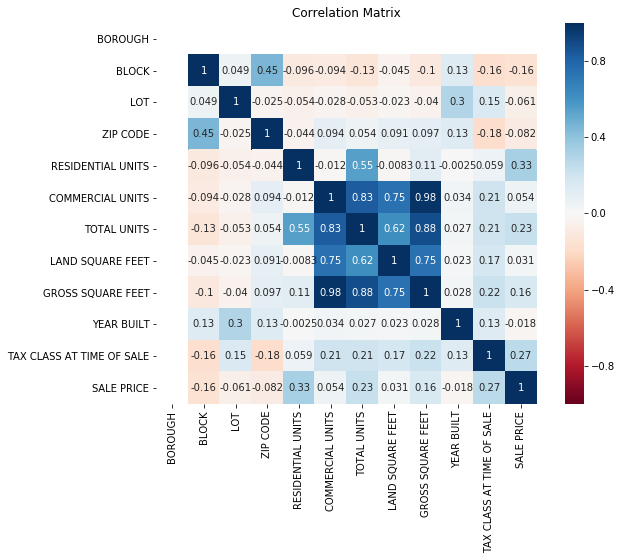

In [ ]:
plt.subplots(figsize=(10,7))
corr_matrix = raw_data.corr()
corr = sns.heatmap(corr_matrix, square=True, annot=True, vmax=1.0, vmin=-1.0, cmap="RdBu").set_title('Correlation Matrix')
plt.yticks(rotation=0)
plt.xticks(rotation=90)


## <a name="data_visualization"></a>Data Visualization
In this section we will use matplotlib and seaborn packages to plot basic common plot while doing data analysis

Distribution plot for a numeric variable. Can see the right long tail for "price"

Mean sale Price = 1018869.3024453025
Median sale Price = 485000.0


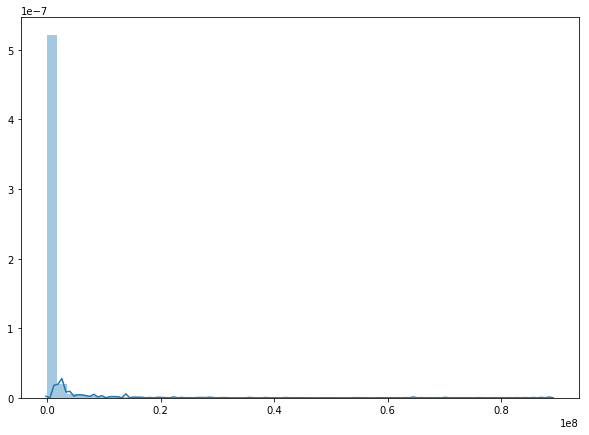

In [ ]:
print("Mean sale Price = " + str(np.mean(raw_data["SALE PRICE"].values)))
print("Median sale Price = " + str(np.median(raw_data["SALE PRICE"].values)))
plt.subplots(figsize=(10,7))
sns.distplot(raw_data["SALE PRICE"].values, label="Sale price")

Distribution plot for a categorical variable

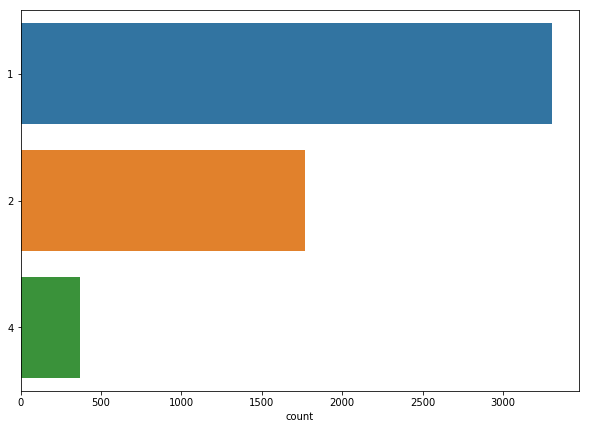

In [ ]:
plt.subplots(figsize=(10,7))
sns.countplot(y = raw_data["TAX CLASS AT TIME OF SALE"].values)

Analyzing a numeric variable distrbution per a categorical variable values using boxplots.

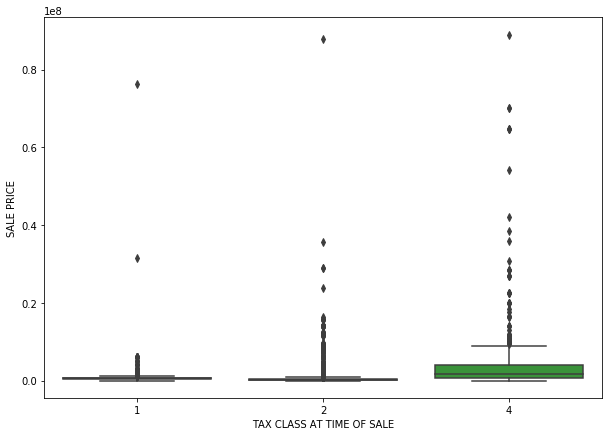

In [ ]:
plt.subplots(figsize=(10,7))
sns.boxplot(x="TAX CLASS AT TIME OF SALE", y="SALE PRICE", data=raw_data);


Analyzing a numeric variable distrbution per a categorical variable values using density plots.

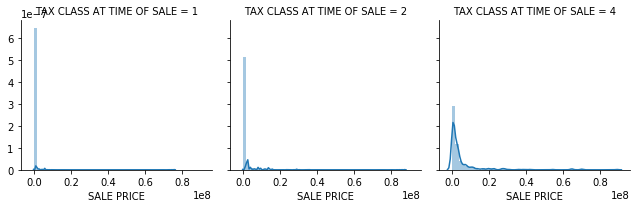

In [ ]:
g=sns.FacetGrid(raw_data, col='TAX CLASS AT TIME OF SALE')
g.map(sns.distplot, "SALE PRICE")

Analyzing two numeric variables. Plotting an advanced scatter plot

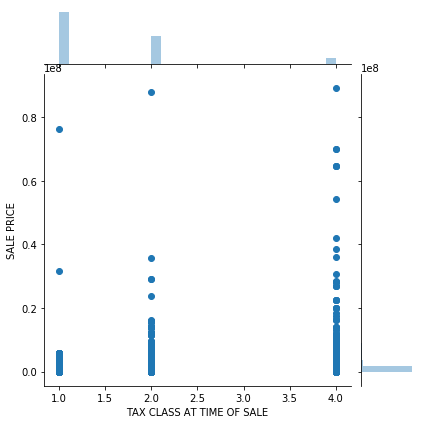

In [ ]:
sns.jointplot(x="TAX CLASS AT TIME OF SALE", y="SALE PRICE", data=raw_data)

Analyze automatically all numerical variables pairwaise combinations

C:\Users\aavivi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\aavivi\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


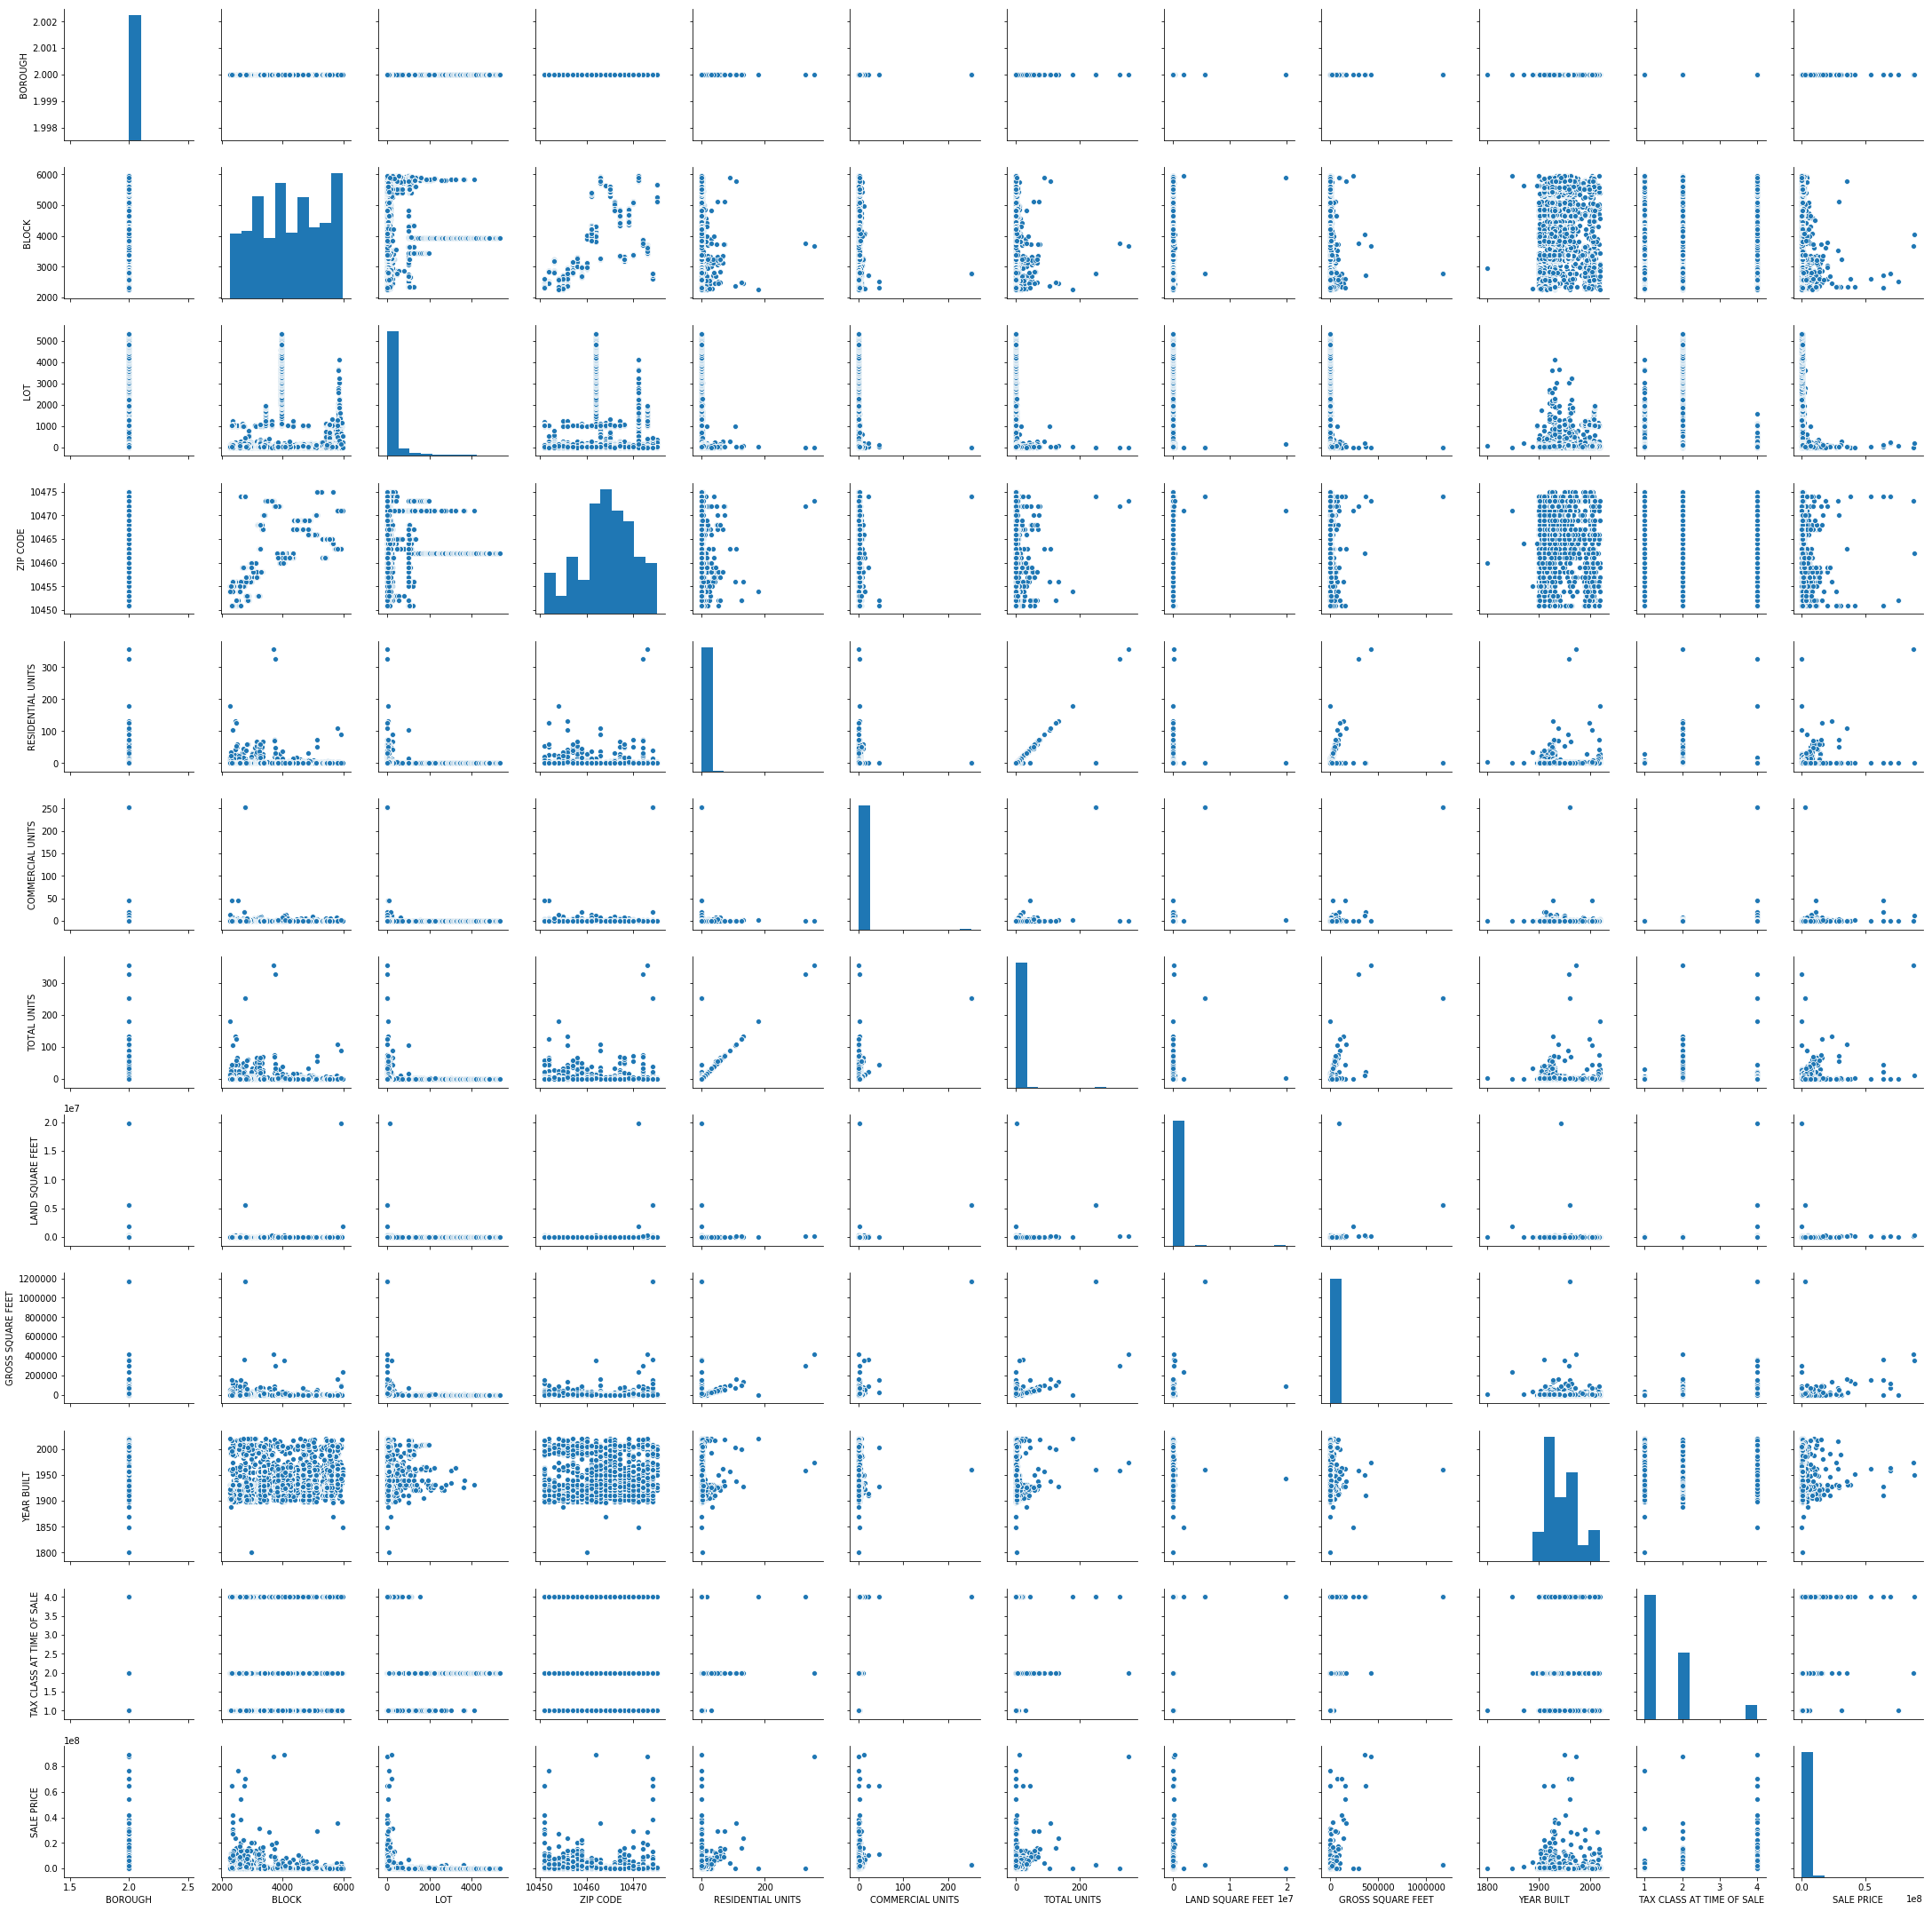

In [ ]:
sns.pairplot(raw_data)